## Handling Outliers

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\Python\Data\newplacementdata - newplacementdata.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

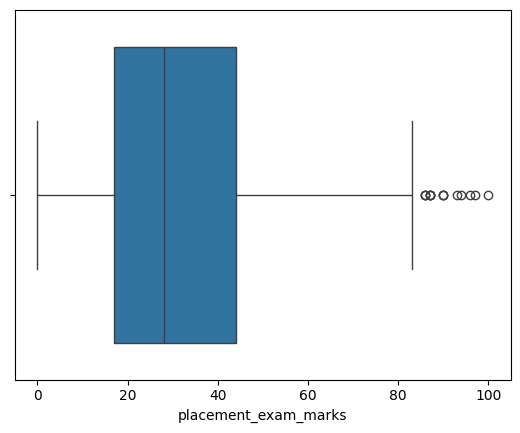

In [5]:
sns.boxplot(x = df['placement_exam_marks'])

In [7]:
## Finding the IQR

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [8]:
percentile25

np.float64(17.0)

In [9]:
percentile75

np.float64(44.0)

In [10]:
IQR = percentile75 - percentile25
IQR

np.float64(27.0)

In [11]:
upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)
print("Upper Limit: ", upper_fence)
print("Lower Limit: ", lower_fence)

Upper Limit:  84.5
Lower Limit:  -23.5


### Finding Our Outliers

In [12]:
df[df['placement_exam_marks'] > upper_fence]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [13]:
df[df['placement_exam_marks'] < lower_fence]

,cgpa,placement_exam_marks,placed


Techniques to remove Outliers

1. Trimming ---> 4(lower) ----1, upper(25) -----(50) ---> here 1,50 are outliers --->
lower(4)  <-----> upper(25) mid data

2. Capping-----> 4(lower) ----1, upper(25) -----(50) ---> capping lower point lowest point(1) and upper point upper point(50)
range expand ----> outliers remove

In [14]:
## Trimming ---> Outlier Removing Technique
new_df = df[df['placement_exam_marks'] < upper_fence]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


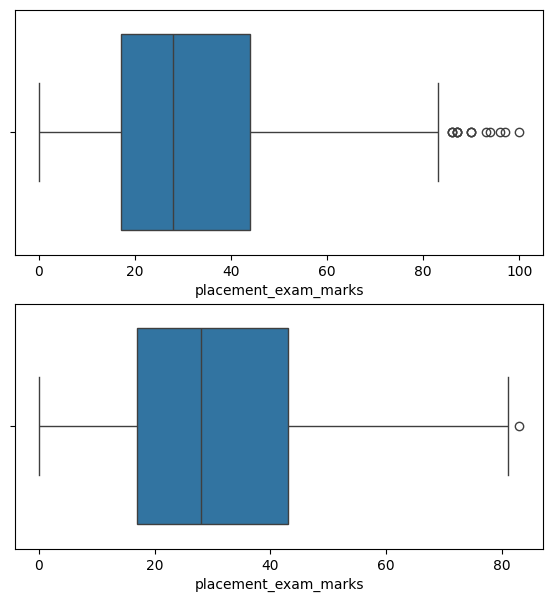

In [16]:
## Comparison
plt.figure(figsize= (15,7))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = new_df['placement_exam_marks'])

plt.show()

In [17]:
## Capping (Outlier Removing Technique)
new_df_cap = df.copy()

In [22]:
new_df_cap['placement_exam_marks'] = np.where(

    new_df_cap['placement_exam_marks'] > upper_fence, 
    upper_fence,

    np.where(
        new_df_cap['placement_exam_marks'] < lower_fence, 
        lower_fence, new_df_cap['placement_exam_marks'])
        
)

In [24]:
## Same Functionality as above
new_df_cap['placement_exam_marks'] = new_df_cap['placement_exam_marks'].clip(lower_fence, upper_fence)

In [25]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


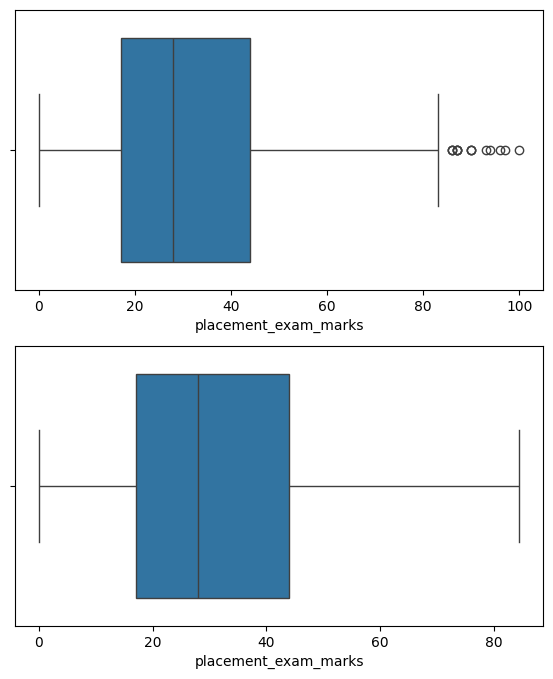

In [26]:
## Comparison
plt.figure(figsize= (15,8))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = new_df_cap['placement_exam_marks'])

plt.show()

## Titanic dataset

In [27]:
df = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\Python\Data\titanic - titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

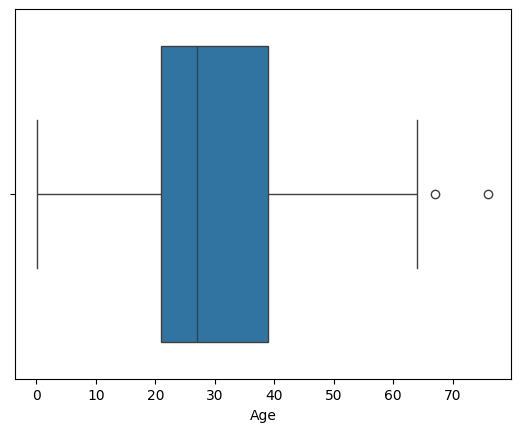

In [30]:
sns.boxplot(x = df['Age'])

In [31]:
## Finding IQR

per25 = df['Age'].quantile(0.25)
per75 = df['Age'].quantile(0.75)

In [32]:
IQR_new = per75 - per25
lower_fence = per25 - 1.5 * (IQR_new)
upper_fence = per75 + 1.5 * (IQR_new)

print("IQR: ", IQR_new)
print("Lower Limit: ", lower_fence)
print("Upper Limit: ", upper_fence)

IQR:  18.0
Lower Limit:  -6.0
Upper Limit:  66.0


In [33]:
## Checking data
df[df['Age'] < lower_fence]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [34]:
df[df['Age'] > upper_fence]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [36]:
new_df = df[df['Age'] < upper_fence]
new_df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 330, dtype: float64

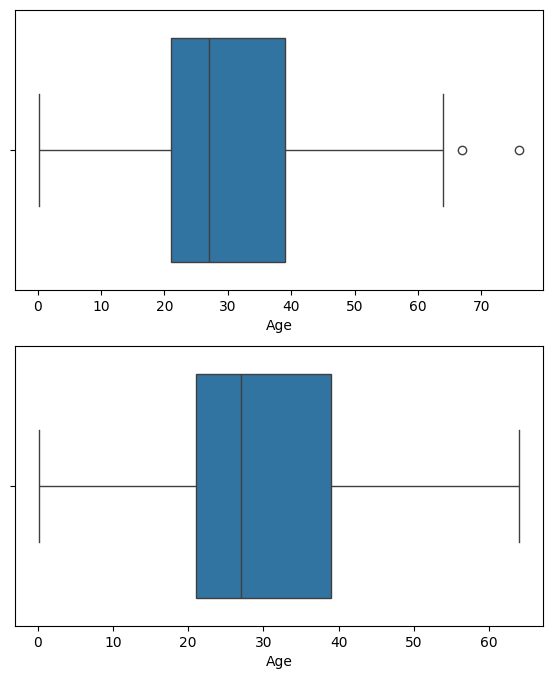

In [37]:
## Comparison
plt.figure(figsize= (15,8))

plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = new_df['Age'])

plt.show()

In [38]:
new_df_cap = df.copy()

In [39]:
new_df_cap['Age'] = new_df_cap['Age'].clip(lower_fence, upper_fence)

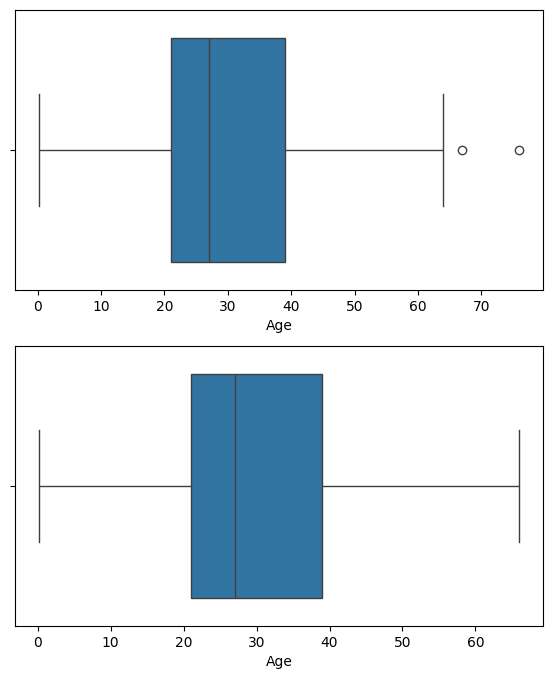

In [40]:
## Comparison
plt.figure(figsize= (15,8))

plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = new_df_cap['Age'])

plt.show()